<a href="https://colab.research.google.com/github/karan7877993/cats-vs-dog-classifier/blob/main/cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dropout
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization


In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [ ]:
#create CNN model
from tensorflow.keras.models import Sequential
model = Sequential()

from tensorflow.keras.layers import Conv2D
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
from tensorflow.keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

from tensorflow.keras.layers import Flatten
model.add(Flatten())

from tensorflow.keras.layers import Dense
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam' ,loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 104ms/step - loss: 1.3211 - accuracy: 0.5560 - val_loss: 0.6767 - val_accuracy: 0.5194
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.6485 - accuracy: 0.6029 - val_loss: 0.7141 - val_accuracy: 0.6502
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5992 - accuracy: 0.6747 - val_loss: 0.6095 - val_accuracy: 0.6682
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5251 - accuracy: 0.7305 - val_loss: 0.4944 - val_accuracy: 0.7512
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4475 - accuracy: 0.7744 - val_loss: 0.6684 - val_accuracy: 0.6486
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4128 - accuracy: 0.7915 - val_loss: 0.4666 - val_accuracy: 0.7592
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3558 - accuracy: 0.8186 - val_loss: 0.5298 - val_ac

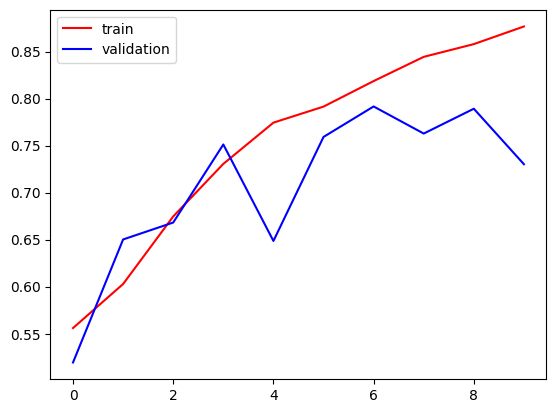

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()



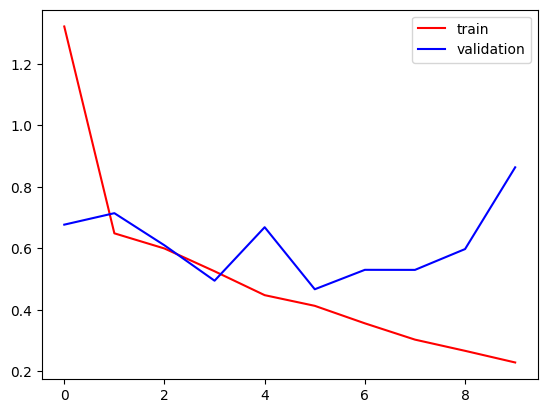

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#way to reduce overfitting

#add more data
#data argumentation
#l1/l2 regularizer
#droupout
#batchnormalization
#reduce complexity



In [ ]:
import cv2

In [ ]:
test_image = cv2.imread('/content/Cat.jpg')


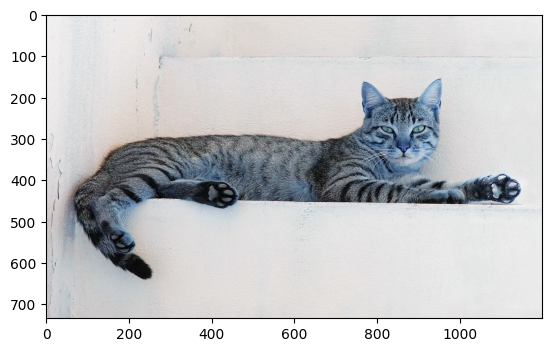

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(734, 1200, 3)

In [ ]:
test_image = cv2.resize(test_image,(256,256))

In [ ]:
test_input = test_image.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 391ms/step


array([[0.46629512]], dtype=float32)